# **IEOR 4404  Simulation (Spring 2020)**

**Homework 2 [Total points: 60]**


**Due 11:59 PM, Feb 20**

Homework 2 consists of application-oriented exercises focusing on

* Python and Statistics basics
* Random Number Generation
* Monte-Carlo Integration

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [1]:
#Your Name: Limeng Lu
#Your UNI: ll3359

In [2]:
#This imports all the packages you need for the homework (you might not use some of them)
#Please run this first
import numpy as np

import scipy.special as spsp

import scipy.stats as spspt

import matplotlib.pyplot as plt

%matplotlib inline


#Exercise 1 [12 Points]
**Setting**

Binomial distribution has the following PMF:

$PMF(x)=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$ where $k=0,1,\dots,n$

For this question, let's assume $n=5$ and $p=0.5$. 


##Q1. [6 Points]

Visualize this distribution using a bar chart.

<BarContainer object of 6 artists>

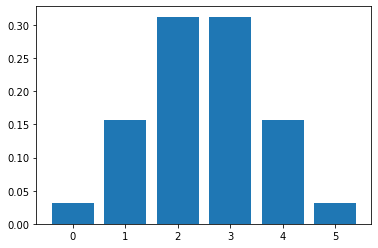

In [7]:
n=5
k=np.arange(0,n+1)
p=0.5
pmf=spsp.factorial(n)/spsp.factorial(k)/spsp.factorial(n-k)*p**k*(1-p)**(n-k)
plt.bar(k,pmf)

##Q2. [6 Points]
CDF(x) gives the probability of getting a value below or equal to x. 

* Report CDF(1) and  CDF(4). [Hint: `np.cumsum(PMF)` can be used to compute CDF]
* Generate 1000 random numbers. Report the percentage of random numbers falling below CDF(1). Also, report the percentage of random numbers falling below CDF(4).

In [8]:
CDF=np.cumsum(pmf)
print(CDF[1],CDF[4])
      
samples=np.random.rand(1000)

percent1=np.size(samples[samples<CDF[1]])/1000
percent4=np.size(samples[samples<CDF[4]])/1000
print(percent1,percent4)

0.1875 0.96875
0.196 0.973


#Exercise 2 [14 Points]
**Setting**

It is suggested that one of the algorithms to generate $y \sim Unif(a,b)$ is to do the following:

* Generate a random number $x$
* Convert this random number $x$ to a sample $y$ using $(b-a) y+a$



##Q1. [8 Points]


* Construct a function with $a$, $b$, and $N$ as the arguments. This function should return an array of N number of random samples $y$ based on the algorithm listed.
* Run this function with $a=5$, $b=10$, and $N=1000$ and  visualize the distribution of the samples.
* In the same plot, plot the targeted theoretical distribution.
* Based on the plot, comment on whether this algorithm seems to be correct.


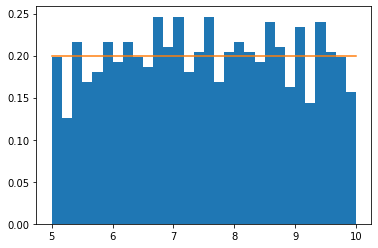

In [9]:
def sampling(a,b,N):
    x=np.random.rand(N)
    return (b-a)*x+a
a=5
b=10
samples=sampling(a,b,1000)
plt.hist(samples,density=True,bins=30)
plt.plot(np.linspace(5,10,1000),np.repeat(1/(b-a),1000))
plt.show()

##It looks like the sample distribution and theoretical distribution line up with one another although not that closely.
##One reason could be the sample size is relatively small. 

## Q2. [6 Points]

* Run the function above with $a=10$, $b=15$, and $N=1000$. Based on the 1000 $y$ samples we generated, construct the 90% confidence interval for the population mean of the distribution $y$ is generated from.

In [10]:
a=10
b=15
N=1000
samples= sampling(a,b,N)
y_mean=np.mean(samples)
y_std=np.std(samples,ddof=1)
lower=y_mean-spspt.norm.ppf(0.95)*y_std/N**0.5
upper=y_mean+spspt.norm.ppf(0.95)*y_std/N**0.5
print(lower,upper)

12.439151868218968 12.588939378226915


#Exercise 3 [18 Points]
**Setting**

We would like to study the Monte-Carlo integration problem based on the following integration:

$\int _2 ^{-\infty} \frac{1}{x^4}+ \frac{1}{x^2}\;dx $



##Q1. [8 Points]

* Compute the integration problem above using Monte-Carlo Integral based on 1000 samples.
* Construct the corresponding 95% confidence interval for the true value of the integration.

In [11]:
a=2
y=np.random.rand(1000)
z=1/y-1+a
hy=(1/z**4+1/z**2)/y**2
np.mean(hy)

0.5413558073436778

In [14]:
hy_mean=np.mean(hy)
hy_std=np.std(hy,ddof=1)
lower=hy_mean-spspt.norm.ppf(0.975)*hy_std/N**0.5
upper=hy_mean+spspt.norm.ppf(0.975)*hy_std/N**0.5
print(lower,upper)

0.5299837336826486 0.552727881004707


##Q2. [10 Points]

This integration problem has an analytical solution equals $\frac{13}{24}$.

Repeat Q1 500 times will allow us to collect 500 different Monte-Carlo integration results. Also, we will get 500 different 95% confidence intervals.

* Plot the distribution of 500 integration results you get. Comment on the shape of the distribution and argue why you see this shape. For this plot, use bins=20.
* Compute the percentage of times these confidence intervals contain the analytical solution.

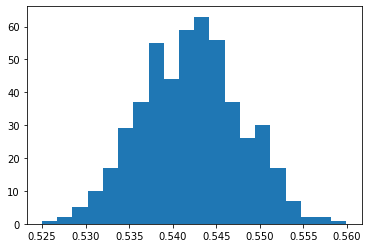

0.96

In [16]:
MC_results=np.empty(500)
CI_included=np.empty(500,bool)
for i in range(500):
    a=2
    y=np.random.rand(1000)
    z=1/y-1+a
    hy=(1/z**4+1/z**2)/y**2
    hy_mean=np.mean(hy)
    hy_std=np.std(hy,ddof=1)
    lower=hy_mean-spspt.norm.ppf(0.975)*hy_std/N**0.5
    upper=hy_mean+spspt.norm.ppf(0.975)*hy_std/N**0.5
    MC_results[i]=hy_mean
    CI_included[i]=lower<13/24 and upper>13/24

plt.hist(MC_results,bins=20)
plt.show()
#look mound-shaped. Based on central limit theorem, Monte-Carlo integration results should follow a normal distribution
np.mean(CI_included)

#Exercise 4 [16 Points]



**Setting**

A continuous distribution B has the following probability density function (PDF):


$f(x)=\begin{cases} \frac{1}{150}x(x - 5) +\frac{2}{45} , \text{if } 0\leq x \leq 10  \\ 0, \text{otherwise}  \end{cases}$



## Q1. [4 Points] 

Visualize this distribution. Make sure to label to $x$, $y$ axis and also give a title to this plot.

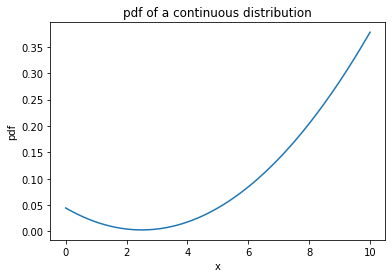

In [17]:
x=np.linspace(0,10,1000)
pdf=1/150*x*(x-5)+2/45
plt.plot(x,pdf)
plt.xlabel("x")
plt.ylabel("pdf")
plt.title("pdf of a continuous distribution")
plt.show()

##Q2. [4 Points]

* Based on 1000 samples, use Monte-Carlo integration to compute the CDF of this distribution at $x=3$.

Remember $F(x)=\int_{-\infty}^{x}f(x) \;dx$

In [18]:
a=0
b=3
y=np.random.rand(1000)
z=(b-a)*y+a
hy=(1/150*z*(z-5)+2/45)*(b-a)
np.mean(hy)

0.04349239705808274

## Q3. [4 Points]

* Based on 1000 samples, use Monte-Carlo integration to compute the expected value of this distribution

Remember $E(x)=\int_{-\infty}^{\infty}f(x)x \;dt$

In [19]:
a=0
b=10
y=np.random.rand(1000)
z=(b-a)*y+a
hy=(1/150*z*(z-5)+2/45)*z*(b-a)
np.mean(hy)

7.782638300187302

## Q4. [4 Points]

* Based on 1000 samples, use Monte-Carlo integration to compute the variance of this distribution

Remember $Var(x)=\int_{-\infty}^{\infty}f(x)x^2\;dx-(E(x))^2$

In [20]:
a=0
b=10
y=np.random.rand(1000)
z=(b-a)*y+a
part1=(1/150*z*(z-5)+2/45)*z**2*(b-a)
part2=(1/150*z*(z-5)+2/45)*z*(b-a)
np.mean(part1)-(np.mean(part2))**2

6.496792074930838

In [21]:
import numpy as np
def MC1():
    a=0
    b=10
    y=np.random.rand(1000)
    z=(b-a)*y+a
    part1=(1/150*z*(z-5)+2/45)*z**2*(b-a)
    part2=(1/150*z*(z-5)+2/45)*z*(b-a)
    return np.mean(part1)-(np.mean(part2))**2
results1=[MC1() for i in range(5000)]
np.mean(results1), np.var(results1,ddof=1)

(4.207406601842853, 4.195010140261606)

In [22]:
def MC2():
    a=0
    b=10
    y=np.random.rand(1000)
    z=(b-a)*y+a
    part1=(1/150*z*(z-5)+2/45)*z**2*(b-a)
    part2=(1/150*z*(z-5)+2/45)*z*(b-a)
    return np.mean(part1)-(np.mean(part2))**2
results2=[MC2() for i in range(5000)]
np.mean(results2), np.var(results2,ddof=1)




(4.164344399640935, 4.418258063298618)